# Static Atmosphere Models

Start with the relevant imports...

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from carpy.environment import atmospheres as atms
from carpy.utility import Quantity

Definitions:

In [2]:
zs = Quantity(np.linspace(0, 80e3), "m")
atmosphere_classes = {atms.ISA, atms.USSA_1976}
methods_to_show = [
        "temperature",
        "density",
        "pressure",
        "speed_of_sound"
    ]

Execution:

computing ISO_2533_1975 temperature...done
computing ISO_2533_1975 density...done
computing ISO_2533_1975 pressure...done
computing ISO_2533_1975 speed_of_sound...done
computing USSA_1976 temperature...done
computing USSA_1976 density...done
computing USSA_1976 pressure...done
computing USSA_1976 speed_of_sound...done


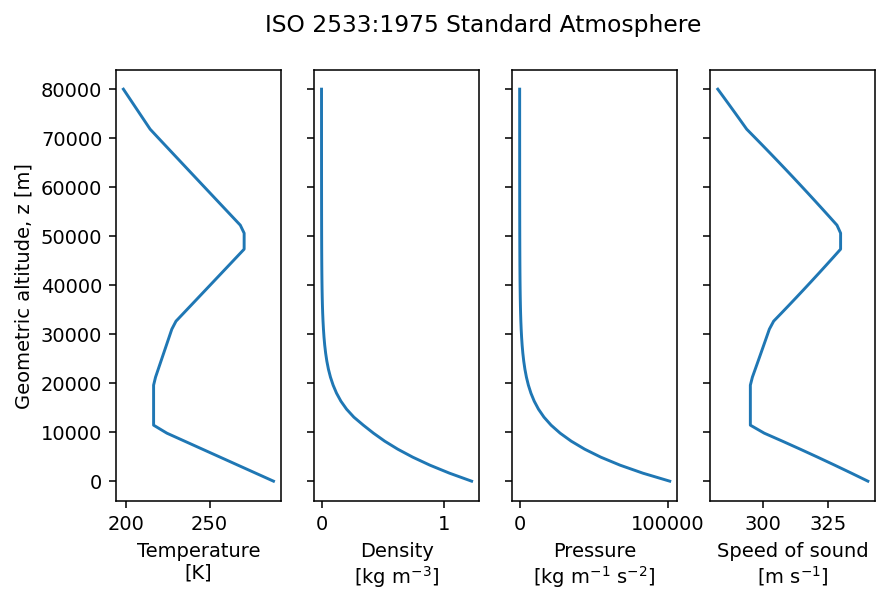

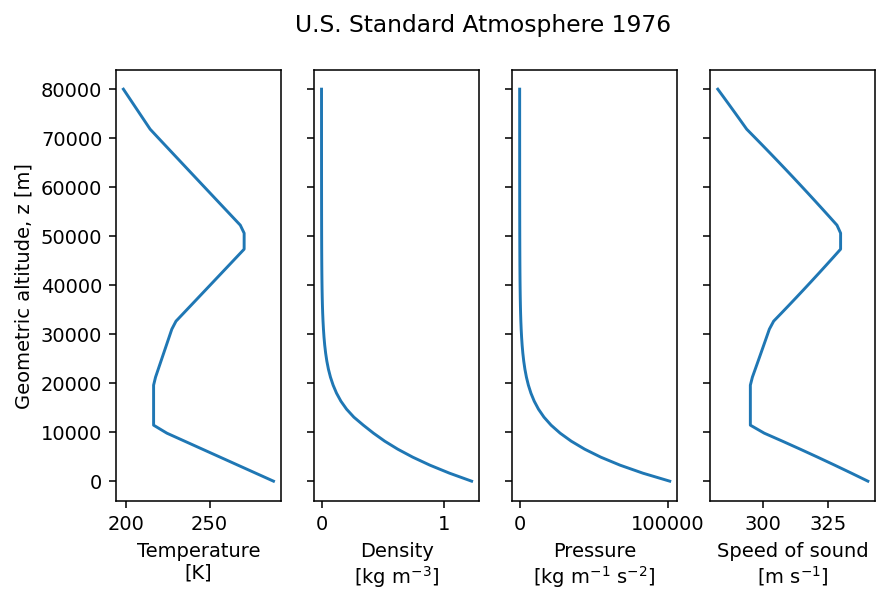

In [3]:
for atm_class in atmosphere_classes:
    
    # Instantiate the atmosphere class
    atm_object = atm_class()

    fig, axs = plt.subplots(1, len(methods_to_show), figsize=(7, 4), sharey=True, dpi=140)
    fig.suptitle(atm_object)
    fig.subplots_adjust(wspace=0.2)

    for i, method_name in enumerate(methods_to_show):
        print(f"computing {atm_class.__name__} {method_name}", end="...")
        result = getattr(atm_object, method_name)(z=zs)
        print("done")
        
        axs[i].plot(result, zs)
        axs[i].set_xlabel(f"{method_name.replace('_', ' ').capitalize()}\n[{result.u.mathtext_si}]")
    axs[0].set_ylabel(f"Geometric altitude, z [{zs.u.mathtext_si}]")

plt.show()